# Data Exploration 2

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [5]:
# Establish postgres access details
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# Start the engine and connect to the database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Perform a select query
performance_df = pd.read_sql_query('SELECT * FROM studentsperformance', con=engine)

# Dispose the engine. We don't need it anymore
engine.dispose()

In [6]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
print(performance_df['gender'].unique())
print(performance_df['race/ethnicity'].unique())
print(performance_df['parental level of education'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


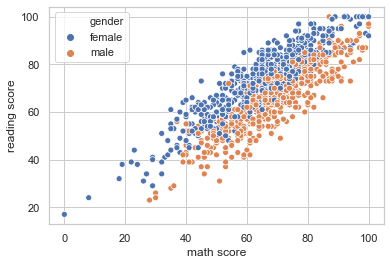

In [9]:
sns.scatterplot(x='math score', y='reading score', data=performance_df, hue='gender')

Text(0.5, 0, 'writing score')

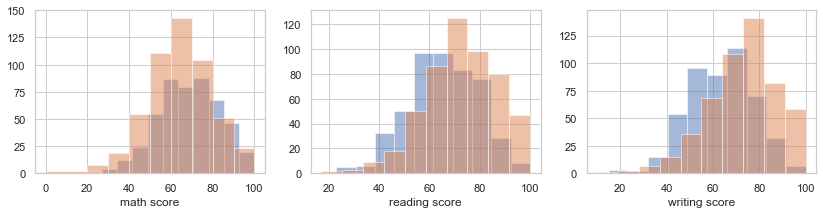

In [53]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(performance_df.loc[performance_df['gender'] == 'male']['math score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['gender'] == 'female']['math score'], alpha=.5)
plt.xlabel('math score')

plt.subplot(132)
plt.hist(performance_df.loc[performance_df['gender'] == 'male']['reading score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['gender'] == 'female']['reading score'], alpha=.5)
plt.xlabel('reading score')

plt.subplot(133)
plt.hist(performance_df.loc[performance_df['gender'] == 'male']['writing score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['gender'] == 'female']['writing score'], alpha=.5)
plt.xlabel('writing score')

In [27]:
subjects = ['math score', 'reading score', 'writing score']
for sub in subjects:
    print('t-test between genders for {}'.format(sub))
    print(stats.ttest_ind(
        performance_df[performance_df['gender'] == 'male'][sub],
        performance_df[performance_df['gender'] == 'female'][sub]
    ))

print('\nGender does separate significantly different subgroups for each subject')

t-test between genders for math score
Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)
t-test between genders for reading score
Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)
t-test between genders for writing score
Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)

Gender does separate significantly different subgroups for each subject


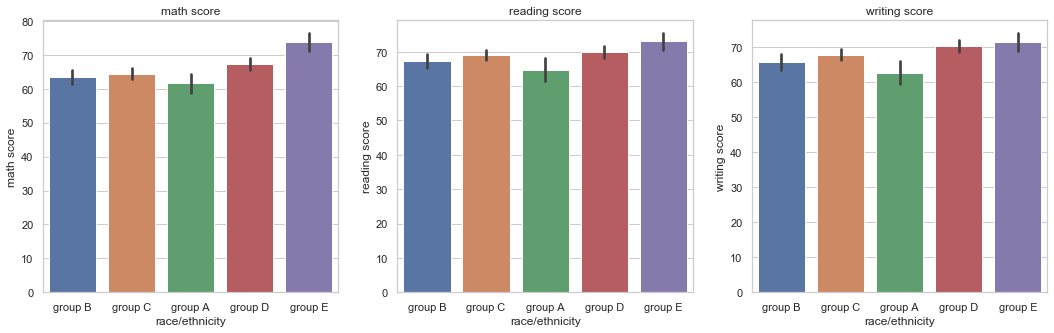

In [28]:
# Visualize differences in scores between races and ethnicities
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(performance_df["race/ethnicity"], performance_df["math score"])
plt.title("math score")

plt.subplot(1,3,2)
sns.barplot(performance_df["race/ethnicity"], performance_df["reading score"])
plt.title("reading score")

plt.subplot(1,3,3)
sns.barplot(performance_df["race/ethnicity"], performance_df["writing score"])
plt.title("writing score")

plt.show()

In [41]:
# Test whether group differences are significant.
races = performance_df["race/ethnicity"].unique()
grouped_df = performance_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(races)):
        for j in range(i+1, len(races)):
            print("t-test between groups {0} and {1}:".format(races[i], races[j]))
            print(stats.ttest_ind(
                performance_df[performance_df["race/ethnicity"]==races[i]][var], 
                performance_df[performance_df["race/ethnicity"]==races[j]][var]
            ))

print('\nSome are significant, some are not')

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


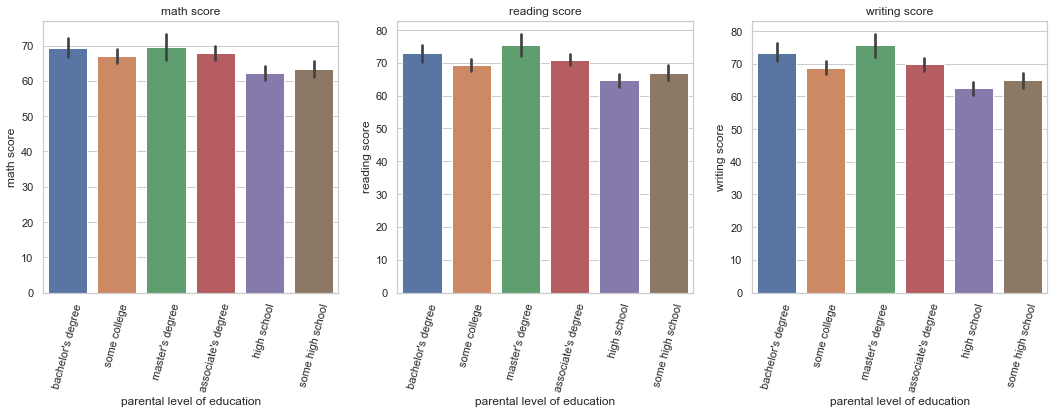

In [38]:
# Visualize differences in scores between different levels of parent education
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(performance_df["parental level of education"], performance_df["math score"])
plt.title("math score")
plt.xticks(rotation=75)

plt.subplot(1,3,2)
sns.barplot(performance_df["parental level of education"], performance_df["reading score"])
plt.title("reading score")
plt.xticks(rotation=75)

plt.subplot(1,3,3)
sns.barplot(performance_df["parental level of education"], performance_df["writing score"])
plt.title("writing score")
plt.xticks(rotation=75)

plt.show()

In [40]:
# Test whether group differences are significant.
races = performance_df["parental level of education"].unique()
grouped_df = performance_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(races)):
        for j in range(i+1, len(races)):
            print("t-test between groups {0} and {1}:".format(races[i], races[j]))
            print(stats.ttest_ind(
                performance_df[performance_df["parental level of education"]==races[i]][var], 
                performance_df[performance_df["parental level of education"]==races[j]][var]
            ))

print('\nSome are significant, some are not')

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

Text(0.5, 0, 'writing score')

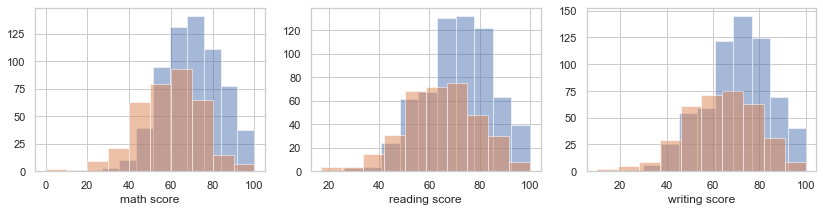

In [52]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(performance_df.loc[performance_df['lunch'] == 'standard']['math score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['lunch'] == 'free/reduced']['math score'], alpha=.5)
plt.xlabel('math score')

plt.subplot(132)
plt.hist(performance_df.loc[performance_df['lunch'] == 'standard']['reading score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['lunch'] == 'free/reduced']['reading score'], alpha=.5)
plt.xlabel('reading score')

plt.subplot(133)
plt.hist(performance_df.loc[performance_df['lunch'] == 'standard']['writing score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['lunch'] == 'free/reduced']['writing score'], alpha=.5)
plt.xlabel('writing score')

In [47]:
subjects = ['math score', 'reading score', 'writing score']
for sub in subjects:
    print('t-test between lunches for {}'.format(sub))
    print(stats.ttest_ind(
        performance_df[performance_df['lunch'] == 'standard'][sub],
        performance_df[performance_df['lunch'] == 'free/reduced'][sub]
    ))

print('\Lunch does separate significantly different subgroups for each subject')
print('Perhaps this is because those who can afford lunch happen to also be able to afford better equipment/tutors/educational aids')

t-test between lunches for math score
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
t-test between lunches for reading score
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
t-test between lunches for writing score
Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)
\Lunch does separate significantly different subgroups for each subject
Perhaps this is because those who can afford lunch happen to also be able to afford better equipment/tutors/educational aids


### 3. Does the test preparation course seem to have an effect on the exam performances?

In [54]:
performance_df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

Text(0.5, 0, 'writing score')

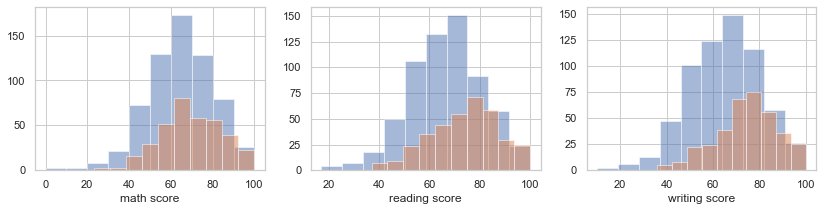

In [56]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(performance_df.loc[performance_df['test preparation course'] == 'none']['math score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['test preparation course'] == 'completed']['math score'], alpha=.5)
plt.xlabel('math score')

plt.subplot(132)
plt.hist(performance_df.loc[performance_df['test preparation course'] == 'none']['reading score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['test preparation course'] == 'completed']['reading score'], alpha=.5)
plt.xlabel('reading score')

plt.subplot(133)
plt.hist(performance_df.loc[performance_df['test preparation course'] == 'none']['writing score'], alpha=.5)
plt.hist(performance_df.loc[performance_df['test preparation course'] == 'completed']['writing score'], alpha=.5)
plt.xlabel('writing score')

In [57]:
subjects = ['math score', 'reading score', 'writing score']
for sub in subjects:
    print('t-test between test preparations for {}'.format(sub))
    print(stats.ttest_ind(
        performance_df[performance_df['test preparation course'] == 'none'][sub],
        performance_df[performance_df['test preparation course'] == 'completed'][sub]
    ))

print('\Test Preparation does separate significantly different subgroups for each subject')

t-test between test preparations for math score
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
t-test between test preparations for reading score
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
t-test between test preparations for writing score
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)
\Lunch does separate significantly different subgroups for each subject
Perhaps this is because those who can afford lunch happen to also be able to afford better equipment/tutors/educational aids


### 4. Which 2 exam scores are most correlated with each other?

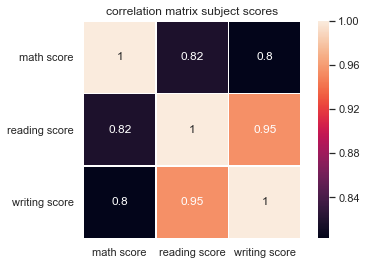

The most correlated subjects are reading and writing


In [63]:
# Make correlation matrices.

corrmat = performance_df.corr()

sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title('correlation matrix subject scores')
plt.yticks(rotation=0)
plt.show()

print('The most correlated subjects are reading and writing')

# DONE